# Hierarchical Clustering

## Step-by-step algorithm agglomerative HC

1. **Start with Initial Clusters:**
   - Treat each data point as an individual cluster.
   - For $N$ data points, initialize $N$ clusters.

2. **Compute the Distance Matrix:**
   - Calculate pairwise distances between clusters using a chosen metric:
     - **Euclidean Distance**
     - **Manhattan Distance**
     - Other distance metrics
   - Store these distances in a matrix.

3. **Find the Closest Clusters:**
   - Identify the pair of clusters with the smallest distance in the matrix.

4. **Merge the Closest Clusters:**
   - Combine the two closest clusters into one cluster.
   - Record the merge for constructing the dendrogram.

5. **Update the Distance Matrix:**
   - Recompute the distances between the newly formed cluster and the remaining clusters using a **linkage method**:
     - **Single Linkage:** Distance between the nearest points of two clusters.
     - **Complete Linkage:** Distance between the farthest points of two clusters.
     - **Average Linkage:** Average distance between all points in two clusters.
     - **Centroid Linkage:** Distance between the centroids of two clusters.

6. **Repeat Steps 3–5:**
   - Continue merging clusters and updating the distance matrix until:
     - All points are in one cluster, or
     - A predefined number of clusters is reached.

7. **Build the Dendrogram:**
   - Use the recorded sequence of merges and distances to construct the hierarchical tree (dendrogram).

8. **Determine Final Clusters (Optional):**
   - Cut the dendrogram at a specific height (distance threshold) to get the desired number of clusters.


## Euclidean Distance

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/600px-Euclidean_distance_2d.svg.png)

$$
d(p, q) = \sqrt {(q_1 - p_1)^2 + (q2 - p2)^2}
$$

## Manhattan Distance

<div>
    <img src="https://www.researchgate.net/publication/333430988/figure/fig8/AS:960478901710860@1606007423711/Example-of-Euclidean-and-Manhattan-distances-between-two-points-A-and-B-The-Euclidean.png" width="200">
</div>

## Linkage Methods

| **Linkage Method**    | **Formula**                                   | **Description**                                                                                                   |
|------------------------|-----------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| **Single Linkage**     | $D_{12} = \min_{ij} d(X_i, Y_j)$          | This is the distance between the closest members of the two clusters.                                            |
| **Complete Linkage**   | $D_{12} = \max_{ij} d(X_i, Y_j)$          | This is the distance between the members that are farthest apart (most dissimilar).                              |
| **Average Linkage**    | $D_{12} = \frac{1}{k_i k_j} \sum_{i=1}^{k_i} \sum_{j=1}^{k_j} d(X_i, Y_j)$ | This method averages the distances between all pairs of data points from the two clusters (UPGMA).               |
| **Centroid Method**    | $D_{12} = d(\bar{X}, \bar{Y})$            | This method calculates the distance between the centroids of the two clusters.                                   |
| **Ward's Method**      | $D_{12} = \sqrt{\frac{2 k_i k_j}{k_i + k_j}} \| \bar{x} - \bar{y} \|$ | This method minimizes the total within-cluster variance using the ESS criterion.                                 |


## Dataset

Have a quick look at the dataset.

In [1]:
%cat ../00_data/Mall_Customers.csv | head

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6
0004,Female,23,16,77
0005,Female,31,17,40
0006,Female,22,17,76
0007,Female,35,18,6
0008,Female,23,18,94
0009,Male,64,19,3


In [2]:
%cat ../00_data/Mall_Customers.csv | tail

0191,Female,34,103,23
0192,Female,32,103,69
0193,Male,33,113,8
0194,Female,38,113,91
0195,Female,47,120,16
0196,Female,35,120,79
0197,Female,45,126,28
0198,Male,32,126,74
0199,Male,32,137,18
0200,Male,30,137,83

## Load the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
df = pd.read_csv('../00_data/Mall_Customers.csv', decimal='.', sep=',')

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
np.sum(df.isna(), axis=0)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Features

+ `Annual Income (k$) `
+ `Spending Score (1-100)`


In [8]:
X = df.iloc[:, [3, 4]].values

In [9]:
X[:10, :]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

## Features scaling

> **Important!** You should scale features before applying HC because it relies on Euclidean distance, and unscaled features with different ranges can disproportionately influence the clustering results.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled[:5, :]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [12]:
# init random seed
random_state = 42

## Use dendrogram to find the optimal number of clusters

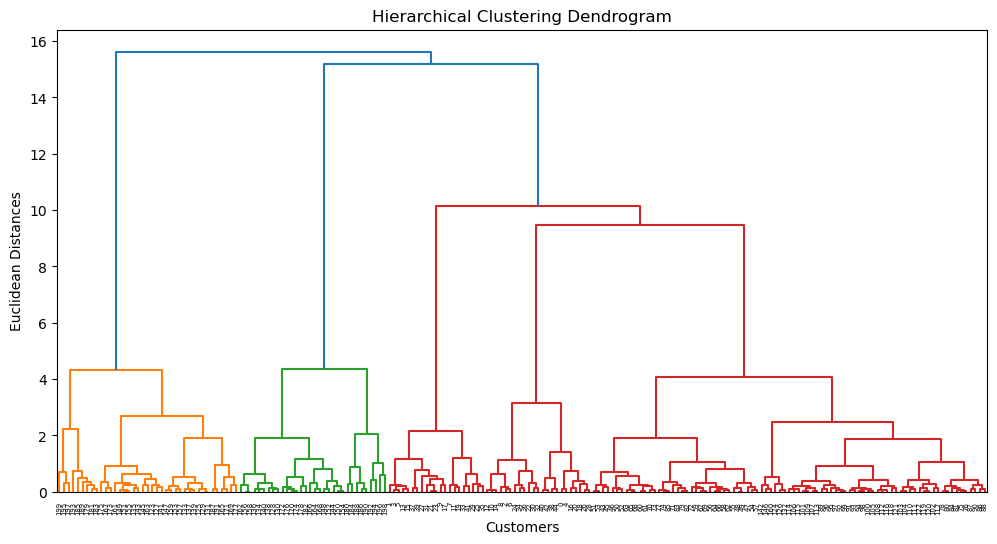

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# 1. Compute the distance matrix using Euclidean distance
distance_matrix = pdist(X_scaled, metric='euclidean') 

# NOTE! Euclidean distance is the default metric 
# for most linkage methods (e.g., ward, single, complete), 
# so we can use the raw data directly without computing 
# the distance matrix manually.
# To compute Manhattan distance use metric="cityblock"

# 2. Apply linkage with Ward's method
link = linkage(distance_matrix, method='ward') 

# 3. Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(link)#, labels=np.arange(1, 11), leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

The optimal number of clusters is **5**.

## Find the optimal threshold

Optimal threshold: 4.354422154062322
Clusters: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 5 1
 2 1 2 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


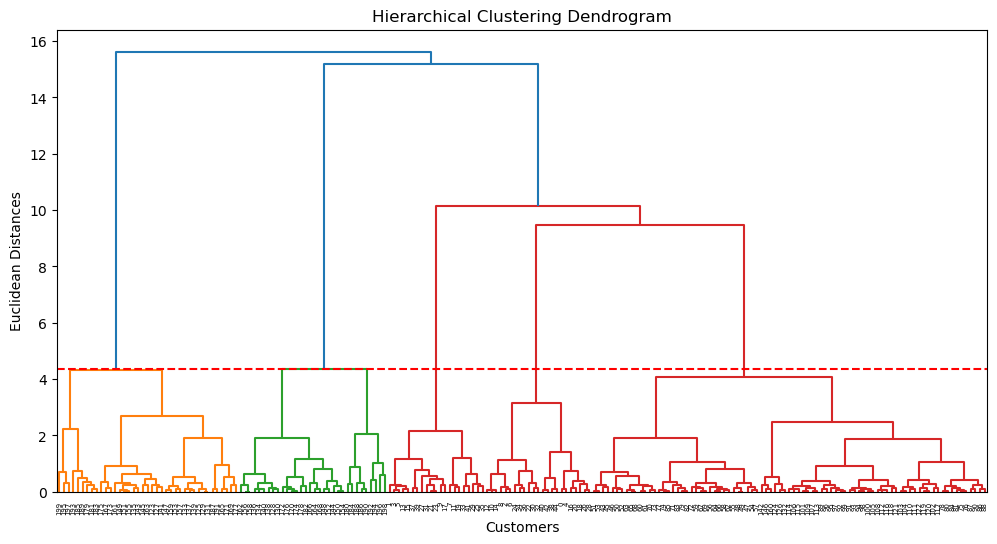

In [14]:

# Extract distances and find the largest jump
distances = link[:, 2]  # Extract distances between clusters - it's the third column
jumps = np.diff(distances)  # Compute differences between successive distances
largest_jump_index = np.argmax(jumps)  # Index of the largest jump
threshold = distances[largest_jump_index]  # Threshold for optimal clustering

# Create flat clusters
clusters = fcluster(link, t=threshold, criterion='distance')

# Display results
print("Optimal threshold:", threshold)
print("Clusters:", clusters)

# Plot the dendrogram for visualization
plt.figure(figsize=(12, 6))
dendrogram(link)#, labels=np.arange(1, 11), leaf_rotation=90, leaf_font_size=10)
# show threshold line
if threshold <= distances[-1]:  # Add threshold line only if it makes sense
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


## Viz the clusters

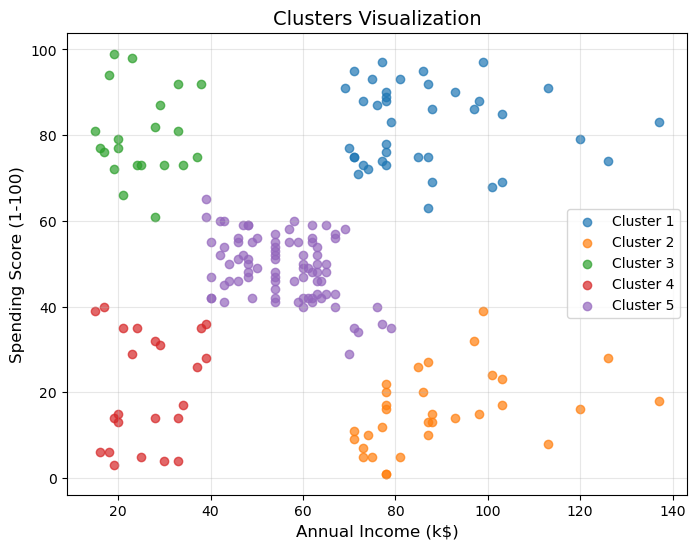

In [15]:
plt.figure(figsize=(8, 6))

for cluster_id in sorted(pd.unique(clusters)):
    plt.scatter(X[clusters == cluster_id, 0], 
                X[clusters == cluster_id, 1], 
                label=f"Cluster {cluster_id}", alpha=0.7)

plt.title("Clusters Visualization", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Train the model on the dataset

In [16]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X_scaled)

y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

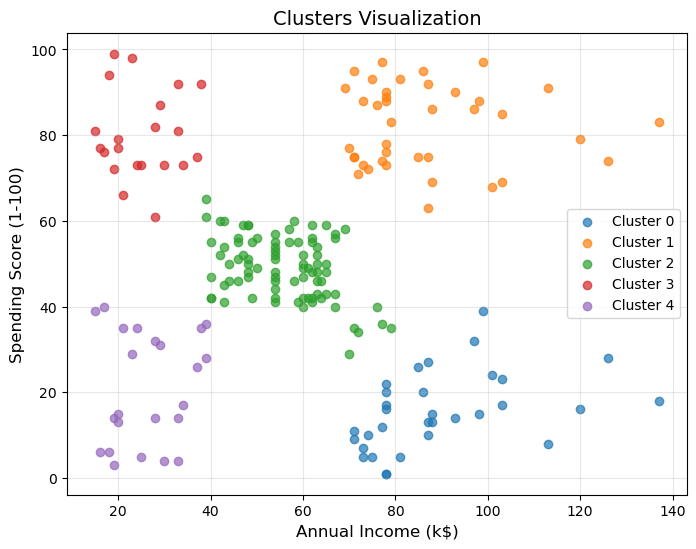

In [17]:
# vix the clusters
plt.figure(figsize=(8, 6))

for cluster_id in sorted(pd.unique(y_hc)):
    plt.scatter(X[y_hc == cluster_id, 0], 
                X[y_hc == cluster_id, 1], 
                label=f"Cluster {cluster_id}", alpha=0.7)

plt.title("Clusters Visualization", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

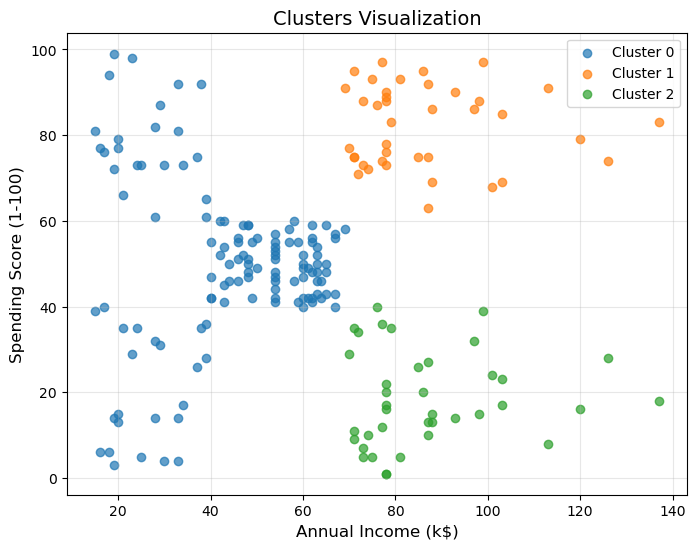

In [18]:
# 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric="manhattan", linkage="average")
y_hc = hc.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))

for cluster_id in sorted(pd.unique(y_hc)):
    plt.scatter(X[y_hc == cluster_id, 0], 
                X[y_hc == cluster_id, 1], 
                label=f"Cluster {cluster_id}", alpha=0.7)

plt.title("Clusters Visualization", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()